# Aarhus

Comments:
- There are duplicates. I have decided to keep the last of the duplicates, assuming its the right information
- There is info on the rooms in S.03 only for one day, so I have dropped them.
- I have dropped all rows for which I did not have information for all the rooms. This leaves me with 1320 rows, which are 55 days. The rest of 2022 has been discarded.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from thermo.utils.time import is_schoolday
v_schoolday = np.vectorize(is_schoolday)

## Bookings

In [14]:
bookings = pd.read_csv("../data/Bookings_updated.csv", engine="pyarrow").loc[lambda x: x["MUNICIPALITY"].eq("Aarhus")]# .drop_duplicates(subset="MUNICIPALITY_DATE_TIME_ROOM", keep='last')

In [15]:
bookings #["TIME_LEFT_OF_BOOKING"].dropna()

,DATE,TIME,MUNICIPALITY,ROOM_ID,MUNICIPALITY_DATE_TIME_ROOM,START_TIME,END_TIME,BOOKED,TIME_LEFT_OF_BOOKING
0,2022-01-01,01:00:00,Aarhus,01.K.01,01-01-2022-01:00:00-01.K.01-Aarhus,None,None,0,NaN
1,2022-01-01,02:00:00,Aarhus,01.K.01,01-01-2022-02:00:00-01.K.01-Aarhus,None,None,0,NaN
2,2022-01-01,03:00:00,Aarhus,01.K.01,01-01-2022-03:00:00-01.K.01-Aarhus,None,None,0,NaN
3,2022-01-01,04:00:00,Aarhus,01.K.01,01-01-2022-04:00:00-01.K.01-Aarhus,None,None,0,NaN
4,2022-01-01,05:00:00,Aarhus,01.K.01,01-01-2022-05:00:00-01.K.01-Aarhus,None,None,0,NaN
...,...,...,...,...,...,...,...,...,...
5353771,2023-12-30,20:00:00,Aarhus,15.S.02,30-12-2023-20:00:00-15.S.02-Aarhus,None,None,0,NaN
5353772,2023-12-30,21:00:00,Aarhus,15.S.02,30-12-2023-21:00:00-15.S.02-Aarhus,None,None,0,NaN
5353773,2023-12-30,22:00:00,Aarhus,15.S.02,30-12-2023-22:00:00-15.S.02-Aarhus,None,None,0,NaN
5353774,2023-12-30,23:00:00,Aarhus,15.S.02,30-12-2023-23:00:00-15.S.02-Aarhus,None,None,0,NaN


In [24]:
bookings["ROOM_ID"].value_counts()

ROOM_ID
01.K.01    17496
09.S.05    17496
08.S.09    17496
08.S.10    17496
08.S.11    17496
           ...  
05.S.19    17496
05.S.20    17496
05.S.21    17496
05.S.22    17496
15.S.02    17496
Name: count, Length: 270, dtype: int64

### Which rooms are never booked?

In [27]:
bookings.groupby("ROOM_ID")["BOOKED"].sum().loc[lambda x: x>0]

ROOM_ID
01.S.01    783
01.S.02    575
01.S.29    944
01.S.37    501
03.S.03     15
03.S.04     15
03.S.05     15
06.S.02    588
08.S.02    186
08.S.05    287
09.S.04    411
Name: BOOKED, dtype: int64

## Electricity

In [28]:
energy = pd.read_csv("../data/Energy.csv").dropna().loc[lambda x: x["MUNICIPALITY"].eq("Aarhus")].loc[lambda x: x["MEASURE_TYPE"].eq("electricity")].loc[lambda x: x["DATO"].str.startswith("2022")].loc[lambda x: x["MEASURE_POINT"].mod(2).eq(0)].drop_duplicates(["DATO", "TIME"], keep="last")

In [29]:
energy

,MEASURE_POINT,DATO,MEASURE_TYPE,VALUE,UNIT,TIME,MUNICIPALITY_DATE,MUNICIPALITY,SCHOOL
28625,3261220102,2022-01-01,electricity,9.72,kWh,23:00:00,2022-01-01-Aarhus,Aarhus,Strandskolen
28626,3261220102,2022-01-02,electricity,9.48,kWh,00:00:00,2022-01-02-Aarhus,Aarhus,Strandskolen
28627,3261220102,2022-01-02,electricity,9.54,kWh,01:00:00,2022-01-02-Aarhus,Aarhus,Strandskolen
28628,3261220102,2022-01-02,electricity,9.42,kWh,02:00:00,2022-01-02-Aarhus,Aarhus,Strandskolen
28629,3261220102,2022-01-02,electricity,9.48,kWh,03:00:00,2022-01-02-Aarhus,Aarhus,Strandskolen
...,...,...,...,...,...,...,...,...,...
37357,3261220102,2022-12-31,electricity,7.74,kWh,21:00:00,2022-12-31-Aarhus,Aarhus,Strandskolen
37358,3261220102,2022-12-31,electricity,7.86,kWh,22:00:00,2022-12-31-Aarhus,Aarhus,Strandskolen
37359,3261220102,2022-12-31,electricity,7.98,kWh,23:00:00,2022-12-31-Aarhus,Aarhus,Strandskolen
37382,3261220102,2022-12-21,electricity,22.14,kWh,18:00:00,2022-12-21-Aarhus,Aarhus,Strandskolen


In [30]:
electricity = energy.set_index(pd.to_datetime(energy["DATO"] + " " + energy["TIME"]))[["VALUE"]]

In [31]:
electricity

,VALUE
2022-01-01 23:00:00,9.72
2022-01-02 00:00:00,9.48
2022-01-02 01:00:00,9.54
2022-01-02 02:00:00,9.42
2022-01-02 03:00:00,9.48
...,...
2022-12-31 21:00:00,7.74
2022-12-31 22:00:00,7.86
2022-12-31 23:00:00,7.98
2022-12-21 18:00:00,22.14


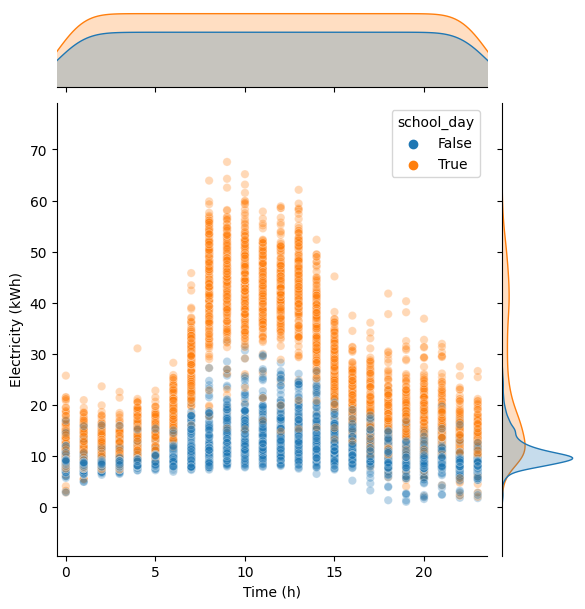

In [42]:
sns.jointplot(electricity.assign(school_day = lambda d: v_schoolday(d.index.date)), x=electricity.index.hour, y="VALUE", hue="school_day", alpha=0.3, xlim=(-0.5,23.5))
plt.xlabel("Time (h)")
plt.ylabel("Electricity (kWh)")
plt.savefig("electricity.png")

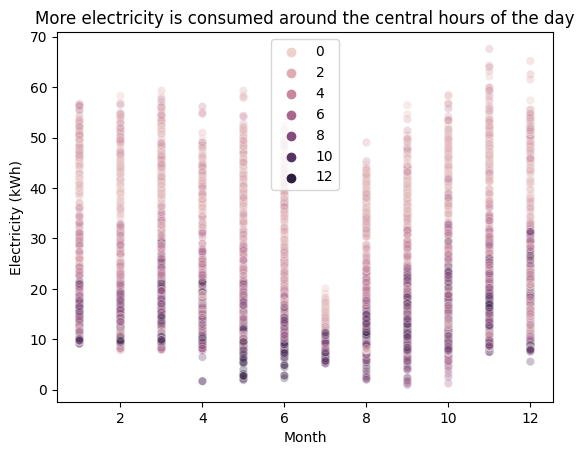

In [10]:
#sns.jointplot(electricity.assign(school_day = lambda d: v_schoolday(d.index.date)), x=electricity.index.month, y="VALUE", hue="school_day", alpha=0.3, xlim=(-0.5,12.5))
sns.scatterplot(electricity.assign(school_day = lambda d: v_schoolday(d.index.date)), x=electricity.index.month, y="VALUE", hue=np.abs(electricity.index.hour-12), alpha=0.3)
plt.xlabel("Month")
plt.ylabel("Electricity (kWh)")
plt.title("More electricity is consumed around the central hours of the day")
plt.show()

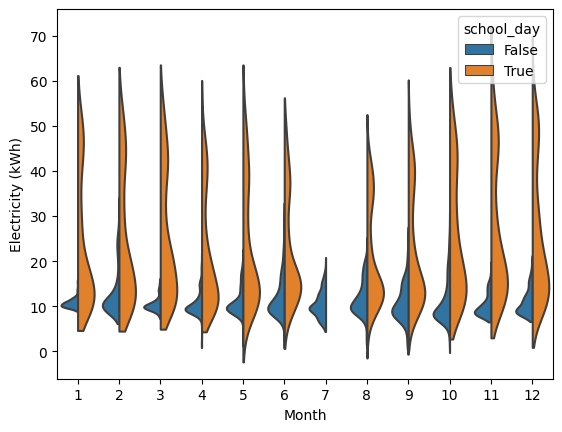

In [11]:
#sns.jointplot(electricity.assign(school_day = lambda d: v_schoolday(d.index.date)), x=electricity.index.month, y="VALUE", hue="school_day", alpha=0.3, xlim=(-0.5,12.5))
sns.violinplot(electricity.assign(school_day = lambda d: v_schoolday(d.index.date)), x=electricity.index.month, y="VALUE", hue="school_day", split=True, cut=1, bw="silverman", scale="width", inner=None)
plt.xlabel("Month")
plt.ylabel("Electricity (kWh)")
plt.show()

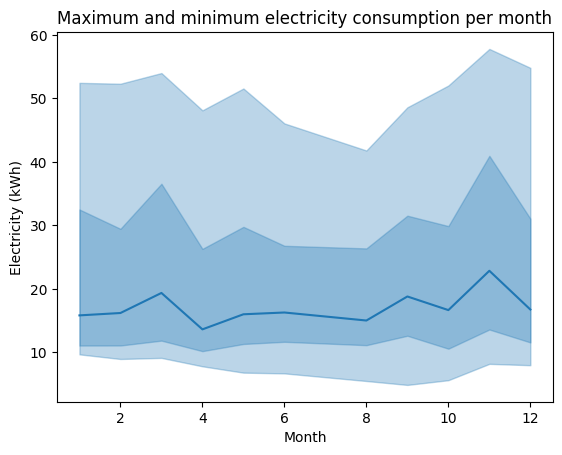

In [12]:
plot_data = sum(electricity.loc[lambda x: x.index.hour>= 8].loc[lambda x: x.index.month !=7].sample(300).assign(month=lambda x: x.index.month).groupby("month")["VALUE"].describe() for i in range(60)).div(60)
plt.plot(plot_data.index, plot_data["50%"])
plt.fill_between(plot_data.index, plot_data["min"], plot_data["max"], color="tab:blue", alpha=0.3, interpolate=True)
plt.fill_between(plot_data.index, plot_data["25%"], plot_data["75%"], color="tab:blue", alpha=0.3, interpolate=True)
plt.title("Maximum and minimum electricity consumption per month")
plt.xlabel("Month")
plt.ylabel("Electricity (kWh)")
plt.show()

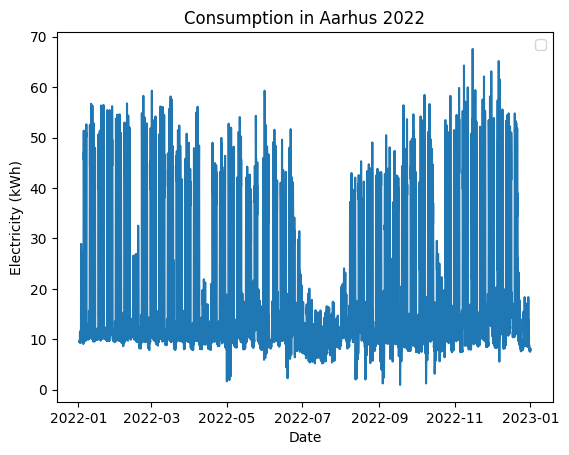

In [45]:
sns.lineplot(electricity.sort_index())
plt.ylabel("Electricity (kWh)")
plt.xlabel("Date")
plt.legend([],[])
plt.title("Consumption in Aarhus 2022")
plt.savefig("consumption.png")

<Axes: xlabel='dayofweek_hour', ylabel='VALUE'>

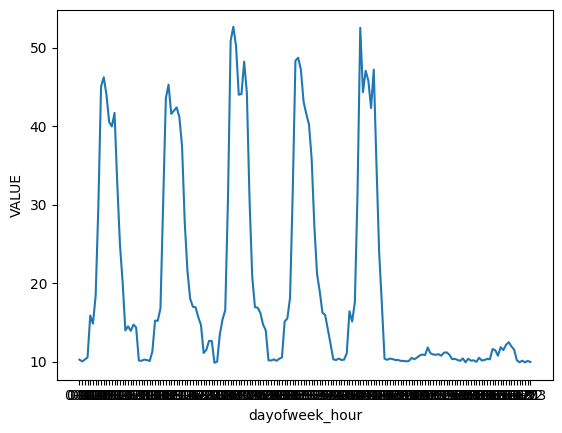

In [40]:
sns.lineplot(
    data = (electricity
     .loc[lambda x: x.index.month==1]
     .assign(
         week=lambda x: x.index.isocalendar().week,
         year=lambda x: x.index.year,
         dayofweek_hour = lambda x: x.index.dayofweek.astype(str).str.cat(x.index.hour.astype(str).str.pad(width=2, fillchar="0"), sep="-")
     )
 .groupby("dayofweek_hour")["VALUE"].mean()),
)

## CO2

In [13]:
iot = pd.read_csv("../data/Indoor_Climate.csv").loc[lambda x: x["MUNICIPALITY"].eq("Aarhus")] # We don't have data

In [14]:
iot

,ROOM_ID,DATE,TIME,TEMPERATURE,CO2,MUNICIPALITY_DATE_TIME_ROOM,MUNICIPALITY,SCHOOL
